<div>
<h1>Solve Xporters traffic volume problem - Preprocessing</h1>
<em><font size="-2">Organisers : Alexis de Russ&eacute;, Florian Bertelli, Gaspard Donada--Vidal, Ghassen Chaabane, Moez Ezzeddine, Ziheng Li</font></em>
<hr>
<figure><img src="logo.jpg", width=300, border=20 style="float:left;margin:5px"></figure>
<p><br>This code was tested with Python 3.7 |Anaconda custom (64-bit)| (Oct 01 2019, 11:07:29) (<a href="https://anaconda.org/">https://anaconda.org/</a>).<br>
<font size="-3">ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</font></p></div>

<div>
    <h2>Introduction </h2>
    <p>
With globalization, our world tends to be more and more connected, so this implies more and more transport. There
 are various types of transports: transports of goods, energy, information, or people.This century will be marked by a revolution in the transport of people. With the development of autonomous cars, more and more data will be collected: speed, location, population,etc. The challenge is to get value from this. As the number of cars, and particularly autonomous cars tends to grow, we'll need to deal with an increasing traffic flow to avoid huge traffic jams. Indeed, some experts pretend that autonomous vehicles will be able to reduce travelling timeup to 30%, even if the world traffic increases of 10%.
But how is it possible to reduce travelling time and traffic jams if the number of vehicles increases ? Thanks to prediction. <br>
        In fact, prediction will be the key to determine the fastest way to get you from your home to your work, without getting in traffic jams. Predictions may also be used to determine which transportation infrastructures to
build.
            <p>
Xporters challenge is a small standard multivariable regression data set from the <a href="http://archive.ics.uci.edu/ml/datasets/">UCI Machine Learning Repository</a>, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features


In [1]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
model_dir = './sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = './sample_result_submission/' 
problem_dir = './ingestion_program/'  
score_dir = './scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
</div>

In [3]:
from data_io import read_as_df
#data_dir = 'input_data'        # Change this to the directory where you put the input data
data_dir = './all_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!pwd
!ls $data_dir*

/Users/shuangruichen/Desktop/Mini Projet/Segway-master/starting_kit
xporters_feat.name      xporters_test.data      xporters_valid.data
xporters_private.info   xporters_train.data
xporters_public.info    xporters_train.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [4]:
data = read_as_df(data_dir  + '/' + data_name)             # The data are loaded as a Pandas Data Frame

Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


In [5]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
0,0,267.510,0.0,0.0,40,85.821965,6,1,12,2017,...,0,0,0,0,0,0,0,0,0,759.0
1,0,293.720,0.0,0.0,90,72.271517,5,11,6,2018,...,0,0,0,0,0,0,0,0,0,4085.0
2,0,302.180,0.0,0.0,0,65.922514,1,19,7,2013,...,0,0,0,0,0,0,0,0,0,3528.0
3,0,255.580,0.0,0.0,75,90.673493,1,5,2,2014,...,0,0,0,0,0,0,0,0,0,2636.0
4,0,286.381,0.0,0.0,0,97.325080,2,18,10,2016,...,0,0,0,0,0,0,0,0,0,4226.0


In [6]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,...,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,0.001245,281.197804,0.379081,0.000203,49.350284,80.079942,2.984311,11.408578,6.518009,2015.510645,...,0.000337,0.005990,0.002515,0.000052,0.001167,0.000363,0.001193,0.000856,0.000415,3258.740788
std,0.035259,13.239935,50.073028,0.007602,39.029958,9.992938,2.003339,6.947282,3.405988,1.892133,...,0.018358,0.077165,0.050091,0.007202,0.034141,0.019050,0.034518,0.029241,0.020365,1987.121630
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.724760,0.000000,0.000000,1.000000,2012.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,73.343967,1.000000,5.000000,4.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1195.000000
50%,0.000000,282.341000,0.000000,0.000000,64.000000,80.134711,3.000000,11.000000,7.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3377.000000
75%,0.000000,291.790000,0.000000,0.000000,90.000000,86.771668,5.000000,17.000000,9.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,128.465356,6.000000,23.000000,12.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7260.000000


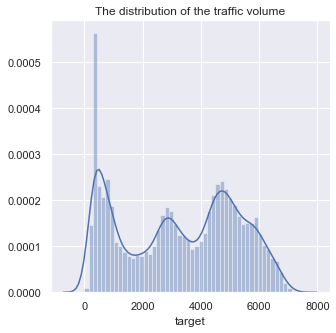

In [7]:
plt.figure(figsize = (5,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

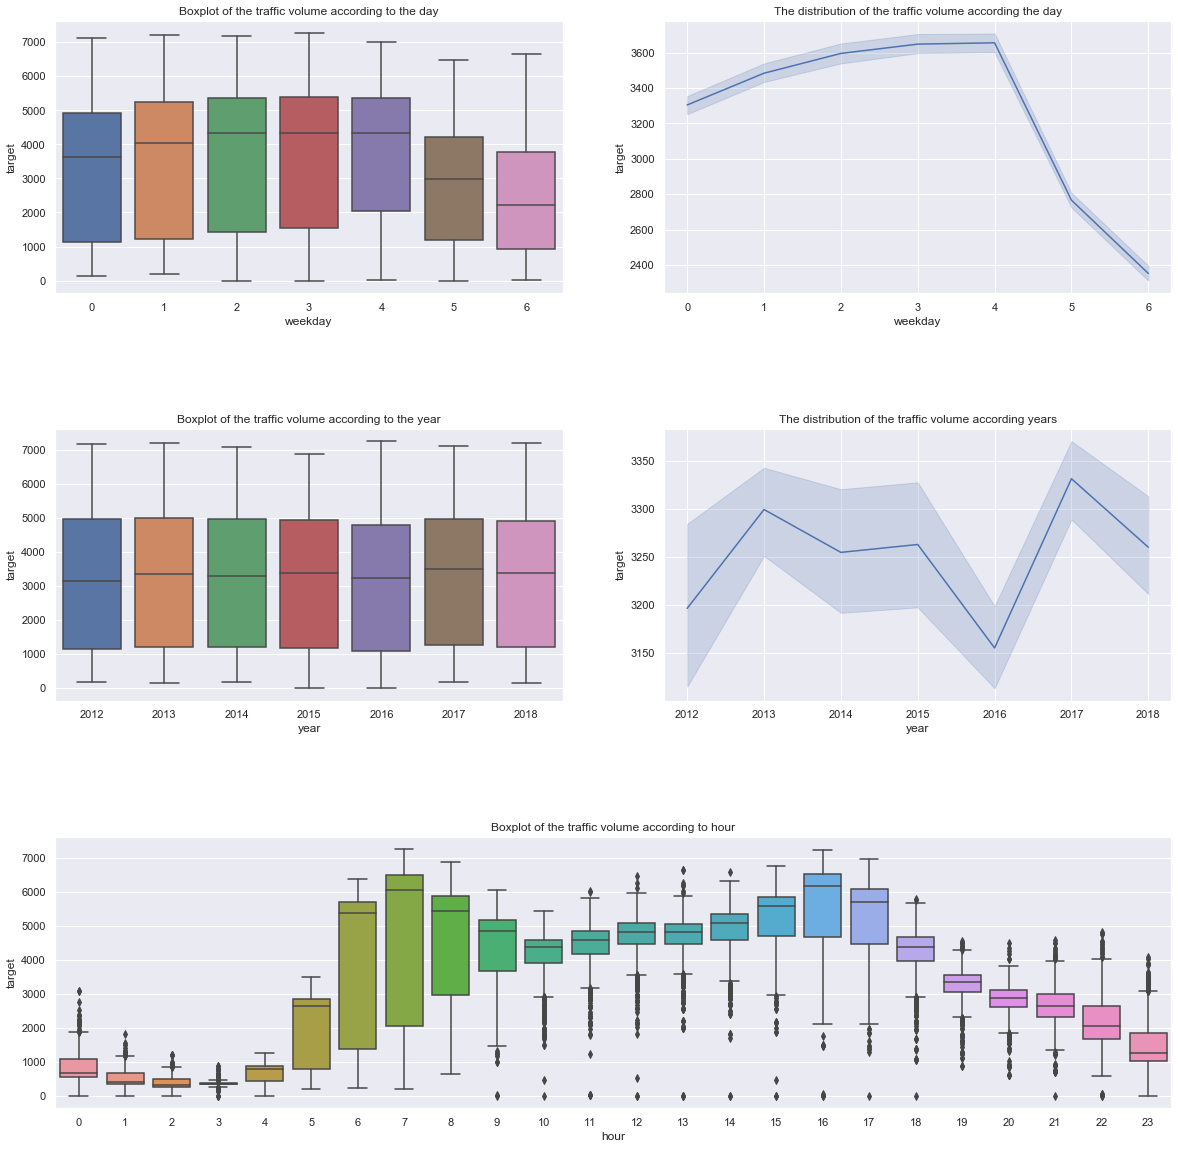

In [8]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

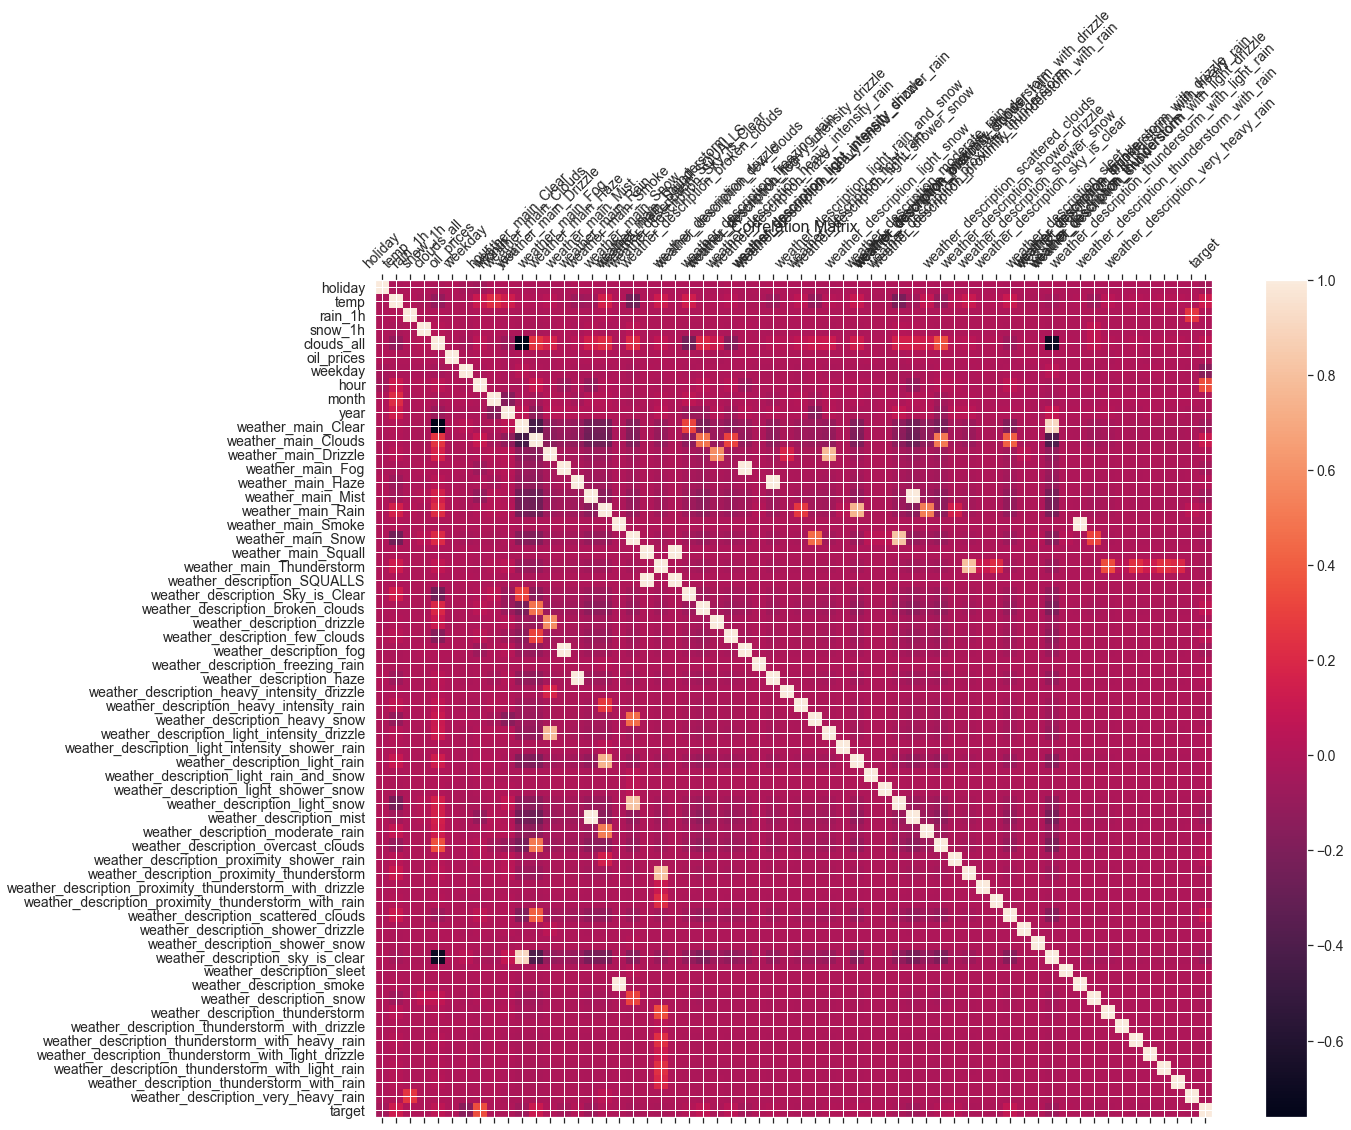

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
print('Most important features according to the correlation with target')
most_important_features = data.corr()['target'].sort_values(ascending=False)[:10]
print (data.corr()['target'].sort_values(ascending=False)[:10], '\n')

Most important features according to the correlation with target
target                                       1.000000
hour                                         0.350545
temp                                         0.131803
weather_main_Clouds                          0.119544
weather_description_scattered_clouds         0.083946
weather_description_broken_clouds            0.065639
clouds_all                                   0.064201
weather_description_few_clouds               0.044360
weather_description_proximity_shower_rain    0.034044
weather_main_Haze                            0.019314
Name: target, dtype: float64 



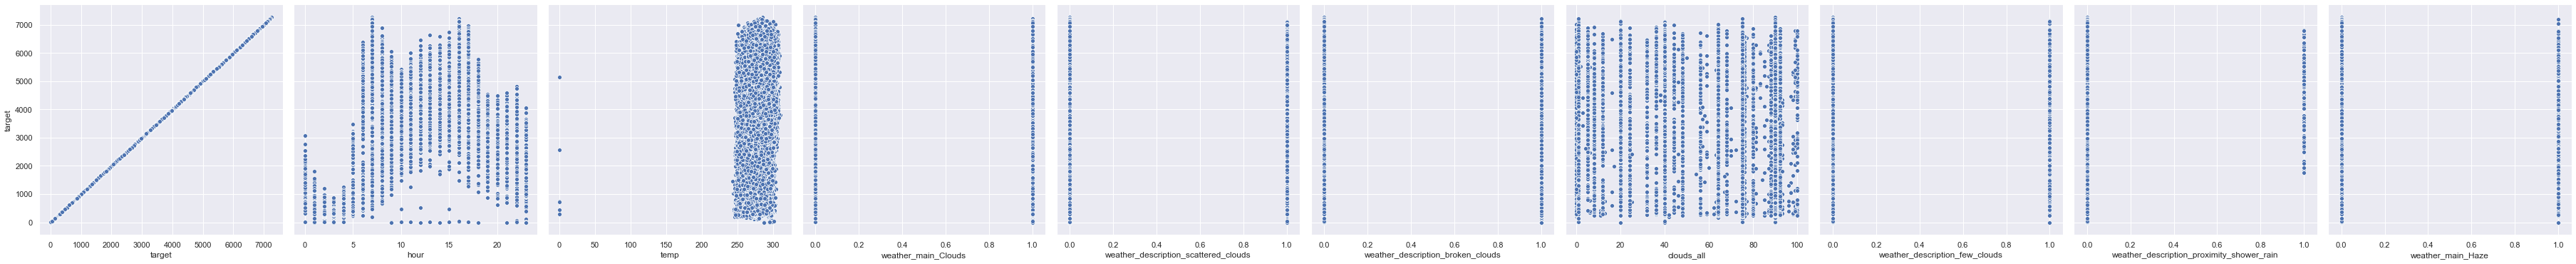

In [11]:
a = list(most_important_features.index)
sns.pairplot(data,height= 5, x_vars = a , y_vars = 'target')
plt.show()

In [12]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)

model_dir = './sample_code_submission/'
result_dir = './sample_result_submission/' 
problem_dir = './ingestion_program/'  
score_dir = './scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Preprocessing Imports
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import LocalOutlierFactor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest, f_regression

In [17]:
# Remove Outliers
outliers = data.copy()
outliers['outliers'] = pd.Series(LocalOutlierFactor(n_neighbors= 200).fit_predict(outliers), 
                                 index = outliers.index)
outliers = outliers[outliers['outliers'] == 1]
outliers = outliers.drop('outliers', 1)
Y = outliers.iloc[:,-1]
print("Remove Outlier Complete")

# Scaler
scaled_data = StandardScaler().fit_transform(outliers)
scaled_data = pd.DataFrame(scaled_data)
print("Scaler Complete")


pca = PCA(n_components = 4).fit_transform(scaled_data)
print("PCA Complete")
svd = TruncatedSVD(n_components=4).fit_transform(scaled_data)
print("SVD Complete")
tsne = TSNE(learning_rate=100).fit_transform(data)
print("TSNE Complete")

Remove Outlier Complete
Scaler Complete
PCA Complete
SVD Complete
TSNE Complete


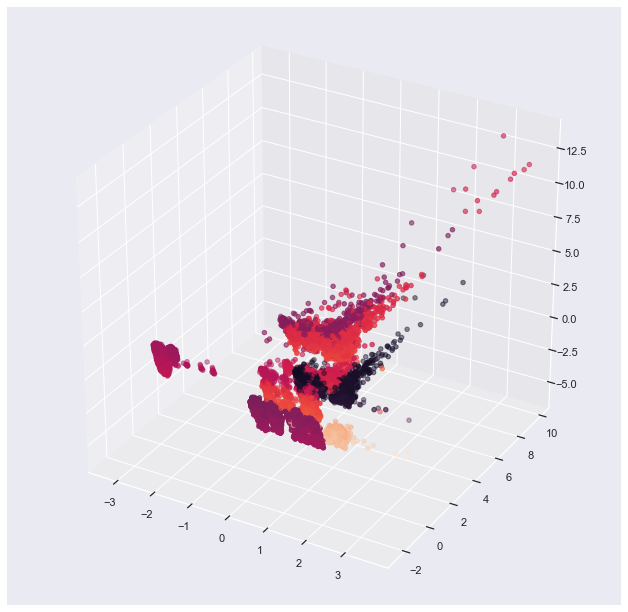

In [18]:
# PCA
fig = plt.figure(figsize = (11, 11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c = pca[:, 3])

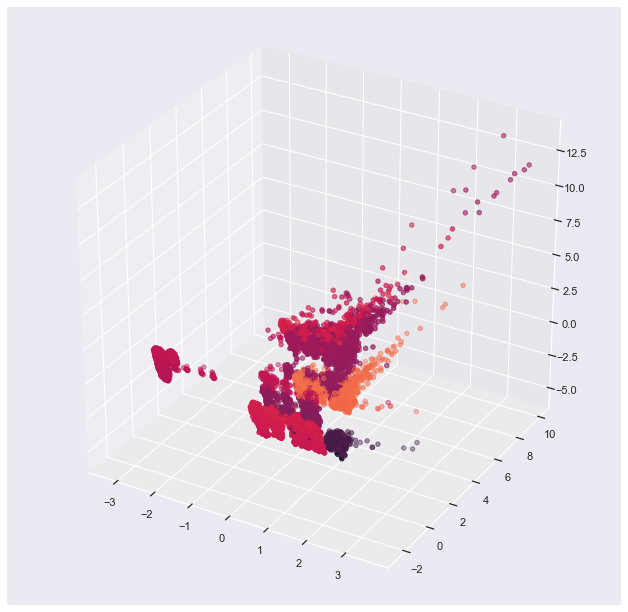

In [19]:
# SVD
fig = plt.figure(figsize = (11, 11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(svd[:, 0], svd[:, 1], svd[:, 2], c = svd[:, 3])

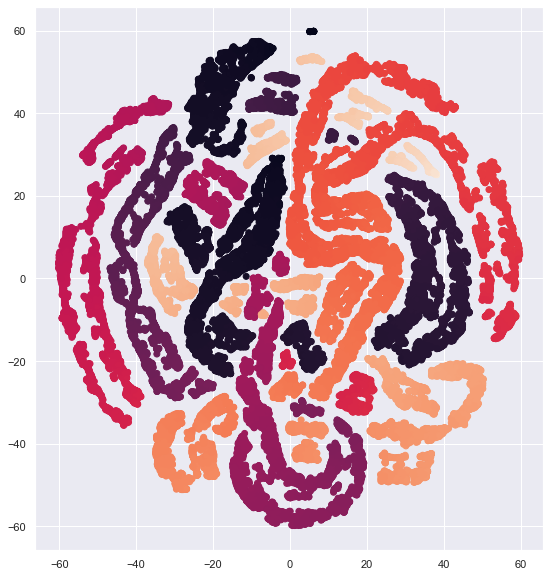

In [23]:
# TSNE
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(121)
ax.scatter(tsne[:, 0], tsne[:, 1], c = data.target)

In [26]:
# Feature selection
X = data[data.columns[0:len(data.columns)-1]].values
Y = data[data.columns[-1]].values
X_new=SelectKBest(score_func=f_regression,k=47).fit_transform(X,Y)
initial_feature_names = data.columns
for i in initial_feature_names:
    for j in range(47):
         a = np.equal(X_new[:,j],data[i].values)
    if a[j] :
        print(i)

holiday
rain_1h
snow_1h
weather_main_Clouds
weather_main_Drizzle
weather_main_Fog
weather_main_Haze
weather_main_Mist
weather_main_Rain
weather_main_Smoke
weather_main_Snow
weather_main_Squall
weather_main_Thunderstorm
weather_description_SQUALLS
weather_description_Sky_is_Clear
weather_description_broken_clouds
weather_description_drizzle
weather_description_few_clouds
weather_description_fog
weather_description_freezing_rain
weather_description_haze
weather_description_heavy_intensity_drizzle
weather_description_heavy_intensity_rain
weather_description_heavy_snow
weather_description_light_intensity_drizzle
weather_description_light_intensity_shower_rain
weather_description_light_rain
weather_description_light_rain_and_snow
weather_description_light_shower_snow
weather_description_light_snow
weather_description_mist
weather_description_moderate_rain
weather_description_overcast_clouds
weather_description_proximity_shower_rain
weather_description_proximity_thunderstorm
weather_descript